<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>


# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.


------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

# The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [23]:
from tensorflow.keras.datasets import fashion_mnist

In [24]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
x_train.shape

(60000, 28, 28)

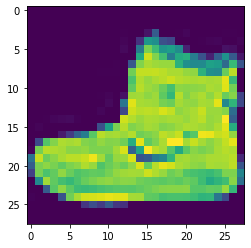

In [27]:
plt.imshow(x_train[0]);

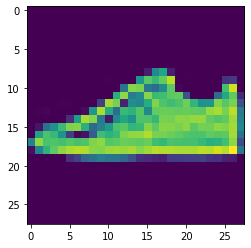

In [28]:
plt.imshow(x_train[1212]);

------

# Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

#### Before Normalizing

In [29]:
x_train[0].min(), x_train[0].max()

(0, 255)

#### After Normalizing,

In [30]:
x_train = x_train/255
x_test =  x_test/255

In [31]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

------

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

#### Before reshaping,

In [32]:
x_train[0].shape

(28, 28)

#### After reshaping,

In [36]:
len(x_train), len(x_test)

(60000, 10000)

In [37]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [38]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [39]:
x_train[0].shape

(28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [40]:
from tensorflow.keras.utils import to_categorical

In [59]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [42]:
y_cat_test = to_categorical(y_test, num_classes=10)

-------

# Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

--------

# Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [128]:
x_train.shape, y_cat_train.shape

((60000, 28, 28, 1), (60000, 10))

In [129]:
x_test.shape, y_cat_test.shape

((10000, 28, 28, 1), (10000, 10))

In [130]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

In [131]:
fitted_model = model.fit(x=x_train, y=y_cat_train,
             validation_data=(x_test, y_cat_test),
             callbacks=[early_stopping],
             epochs=10,
             verbose=1)

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4814 - accuracy: 0.8236 - val_loss: 0.3823 - val_accuracy: 0.8577
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3248 - accuracy: 0.8819 - val_loss: 0.3210 - val_accuracy: 0.8796
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2856 - accuracy: 0.8960 - val_loss: 0.3104 - val_accuracy: 0.8880
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2619 - accuracy: 0.9054 - val_loss: 0.2987 - val_accuracy: 0.8936
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2443 - accuracy: 0.9109 - val_loss: 0.2999 - val_accuracy: 0.8944
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2335 - accuracy: 0.9154 - val_loss: 0.3416 - val_accuracy: 0.8912
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2270 - accuracy: 0.9185 - val_loss: 0.3266 -

----------

# Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

## Model Metrics

In [132]:
model.metrics_names

['loss', 'accuracy']

In [133]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.3415468633174896, 0.8877000212669373]

In [139]:
metrics = pd.DataFrame(fitted_model.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.481437,0.823600,0.382256,0.8577
1,0.324827,0.881850,0.320994,0.8796
2,0.285569,0.895950,0.310421,0.8880
3,0.261937,0.905367,0.298719,0.8936
4,0.244268,0.910900,0.299871,0.8944


<AxesSubplot:>

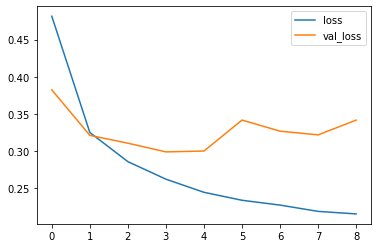

In [140]:
metrics[['loss', 'val_loss']].plot()

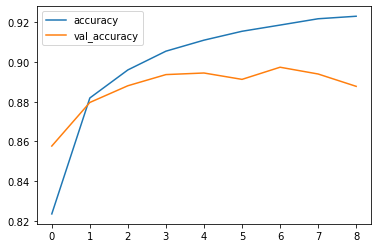

In [141]:
metrics[['accuracy', 'val_accuracy']].plot();

-------

## Classification Report, Confusion Matrix

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [144]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.76      0.81      1000
           3       0.87      0.93      0.90      1000
           4       0.81      0.85      0.83      1000
           5       0.93      0.99      0.96      1000
           6       0.66      0.76      0.71      1000
           7       0.97      0.92      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [145]:
confusion_matrix(y_test, predictions)

array([[766,   7,  14,  31,   2,   2, 165,   0,  13,   0],
       [  0, 977,   1,  12,   3,   0,   5,   0,   2,   0],
       [ 19,   0, 755,  15, 103,   0, 108,   0,   0,   0],
       [ 10,   4,  13, 930,   8,   0,  31,   0,   4,   0],
       [  2,   1,  34,  44, 848,   2,  68,   0,   1,   0],
       [  0,   0,   0,   0,   0, 989,   0,   6,   1,   4],
       [ 64,   2,  45,  32,  85,   0, 755,   0,  17,   0],
       [  0,   0,   0,   0,   0,  41,   0, 915,   0,  44],
       [  1,   1,   4,   2,   0,   8,   6,   2, 976,   0],
       [  0,   0,   1,   0,   0,  16,   0,  17,   0, 966]], dtype=int64)

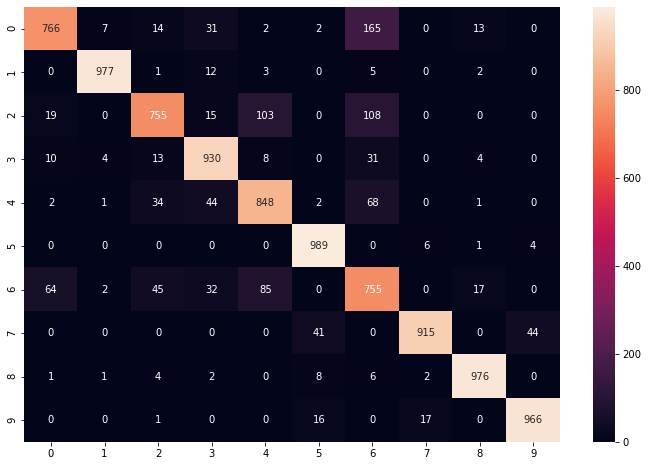

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f');

# Great Job!